# With Software Running

In [4]:
import socket

import numpy as np
from teraflashpy import ACQUISITION_PORT_MAP, LOCALHOST, AcquisitionMode, PulseData

acquisition_mode = AcquisitionMode.Synchronous

In [5]:
teraflash_server_port = ACQUISITION_PORT_MAP[acquisition_mode]
client = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client.connect((LOCALHOST, teraflash_server_port))

length_data = client.recv(6)
pulsedata = client.recv(int(length_data.decode("utf-8")))
client.close()

pulsedata = pulsedata.decode("utf-8").split("\r\n")
header = pulsedata.pop(0)
time = np.zeros(len(pulsedata) - 1, dtype=float)
magnitude = np.zeros(len(pulsedata) - 1, dtype=float)
for x in range(len(pulsedata) - 1):
    time[x] = float(pulsedata[x].split(",")[0])
    magnitude[x] = float(pulsedata[x].split(",")[1])


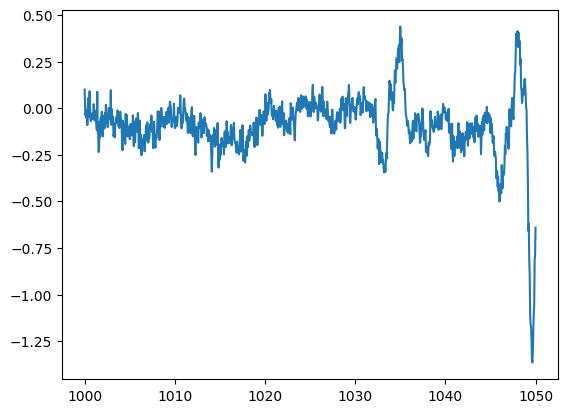

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(time, magnitude)

# Controlling Via Python

In [1]:
import socket

from teraflashpy import LOCALHOST

In [2]:
# client = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# client.connect(("169.254.84.101", 6341))

In [3]:
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.bind(("169.254.84.101", 6341))
# s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
s.listen()
conn, addr = s.accept()

In [4]:
conn.recv(4)

b''

In [1]:
command = b"SYSTEM : TELL STATUS"
content = (
    bytes.fromhex("CDEF1234")
    + bytes.fromhex("789AFEDC")
    + bytes.fromhex("00000002")
    + bytes.fromhex("00000002")
    + len(command).to_bytes(4, "little", signed=False)
    + command
)

TypeError: can't concat str to bytes

In [6]:
conn.sendall(content)

In [7]:
out = conn.recv(4 * 32)
out

b''

In [8]:
# conn.sendall(bytes.fromhex("CDEF1234"))
# conn.sendall(bytes.fromhex("789AFEDC"))
# conn.sendall(bytes.fromhex("00000002"))
# conn.sendall(bytes.fromhex("00000002"))
# command = b"SYSTEM : TELL STATUS"
# conn.sendall(len(command).to_bytes(4, "little", signed=False))
# conn.sendall(command)

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [23]:
conn.close()

In [2]:
write_client = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
write_client.connect((LOCALHOST, 61234))
# write_client.connect((LOCALHOST, 61237))

In [3]:
read_client = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
read_client.connect((LOCALHOST, 61235))

In [4]:
send_output = write_client.send(b"RC-LASER : ON")
print(send_output)

13


In [6]:
asdf = read_client.recv(send_output)

In [ ]:
asdf

In [ ]:
client.close()